<a href="https://colab.research.google.com/github/faizahkh/DATA3402.Spring.2025/blob/main/Week4_Lab3_Kojima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 3
###Members: Akari Kojima, Mariah Cornelio, Diego Maldonado, Faizah Khan, Alaina Siddiqui

###Project 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('houseprice_cleaned.csv')
df.head()

,Unnamed: 0,Size(sqft),Bedrooms,Bathrooms,Year_Built,Price,House_size,Age_category,Location_Rural,Location_Suburban,Location_Urban
0,0,837.000000,1,2,1938,221958.0,1,2,1,0,0
1,1,1378.000000,1,1,2008,771155.0,0,0,0,0,1
2,2,18236.172727,4,1,1952,231932.0,0,2,1,0,0
3,3,4493.000000,1,1,1941,465838.0,0,2,0,0,1
4,4,879.000000,6,3,1179,359178.0,1,2,0,1,0


In [ ]:
# Get the current year
current_year = pd.Timestamp.now().year

# Calculate Age of House
df['Age_of_House'] = current_year - df['Year_Built']

# Create new feature (Size × Age of House)
df['Size_Age'] = df['Size(sqft)'] * df['Age_of_House']

# Display the updated dataset
print(df)


     Unnamed: 0    Size(sqft)  Bedrooms  Bathrooms  Year_Built     Price  \
0             0    837.000000         1          2        1938  221958.0   
1             1   1378.000000         1          1        2008  771155.0   
2             2  18236.172727         4          1        1952  231932.0   
3             3   4493.000000         1          1        1941  465838.0   
4             4    879.000000         6          3        1179  359178.0   
..          ...           ...       ...        ...         ...       ...   
105         105   1984.000000         1          2        1904  600186.0   
106         106  18236.172727         1          2        1179  970910.0   
107         107   3945.000000         3          2        1957  748531.0   
108         108   3068.000000         3          2        1904  237337.0   
109         109   3190.000000         6          3        1912  203355.0   

     House_size  Age_category  Location_Rural  Location_Suburban  \
0             1    

In [ ]:
df['Price_Size'] = df['Price'] * df['Size(sqft)']

# Display the updated dataset
print(df)

     Unnamed: 0    Size(sqft)  Bedrooms  Bathrooms  Year_Built     Price  \
0             0    837.000000         1          2        1938  221958.0   
1             1   1378.000000         1          1        2008  771155.0   
2             2  18236.172727         4          1        1952  231932.0   
3             3   4493.000000         1          1        1941  465838.0   
4             4    879.000000         6          3        1179  359178.0   
..          ...           ...       ...        ...         ...       ...   
105         105   1984.000000         1          2        1904  600186.0   
106         106  18236.172727         1          2        1179  970910.0   
107         107   3945.000000         3          2        1957  748531.0   
108         108   3068.000000         3          2        1904  237337.0   
109         109   3190.000000         6          3        1912  203355.0   

     House_size  Age_category  Location_Rural  Location_Suburban  \
0             1    

In [ ]:
#Drop unecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Size(sqft),Bedrooms,Bathrooms,Year_Built,Price,House_size,Age_category,Location_Rural,Location_Suburban,Location_Urban,Age_of_House,Size_Age,Price_Size
0,837.000000,1,2,1938,221958.0,1,2,1,0,0,87,7.281900e+04,1.857788e+08
1,1378.000000,1,1,2008,771155.0,0,0,0,0,1,17,2.342600e+04,1.062652e+09
2,18236.172727,4,1,1952,231932.0,0,2,1,0,0,73,1.331241e+06,4.229552e+09
3,4493.000000,1,1,1941,465838.0,0,2,0,0,1,84,3.774120e+05,2.093010e+09
4,879.000000,6,3,1179,359178.0,1,2,0,1,0,846,7.436340e+05,3.157175e+08


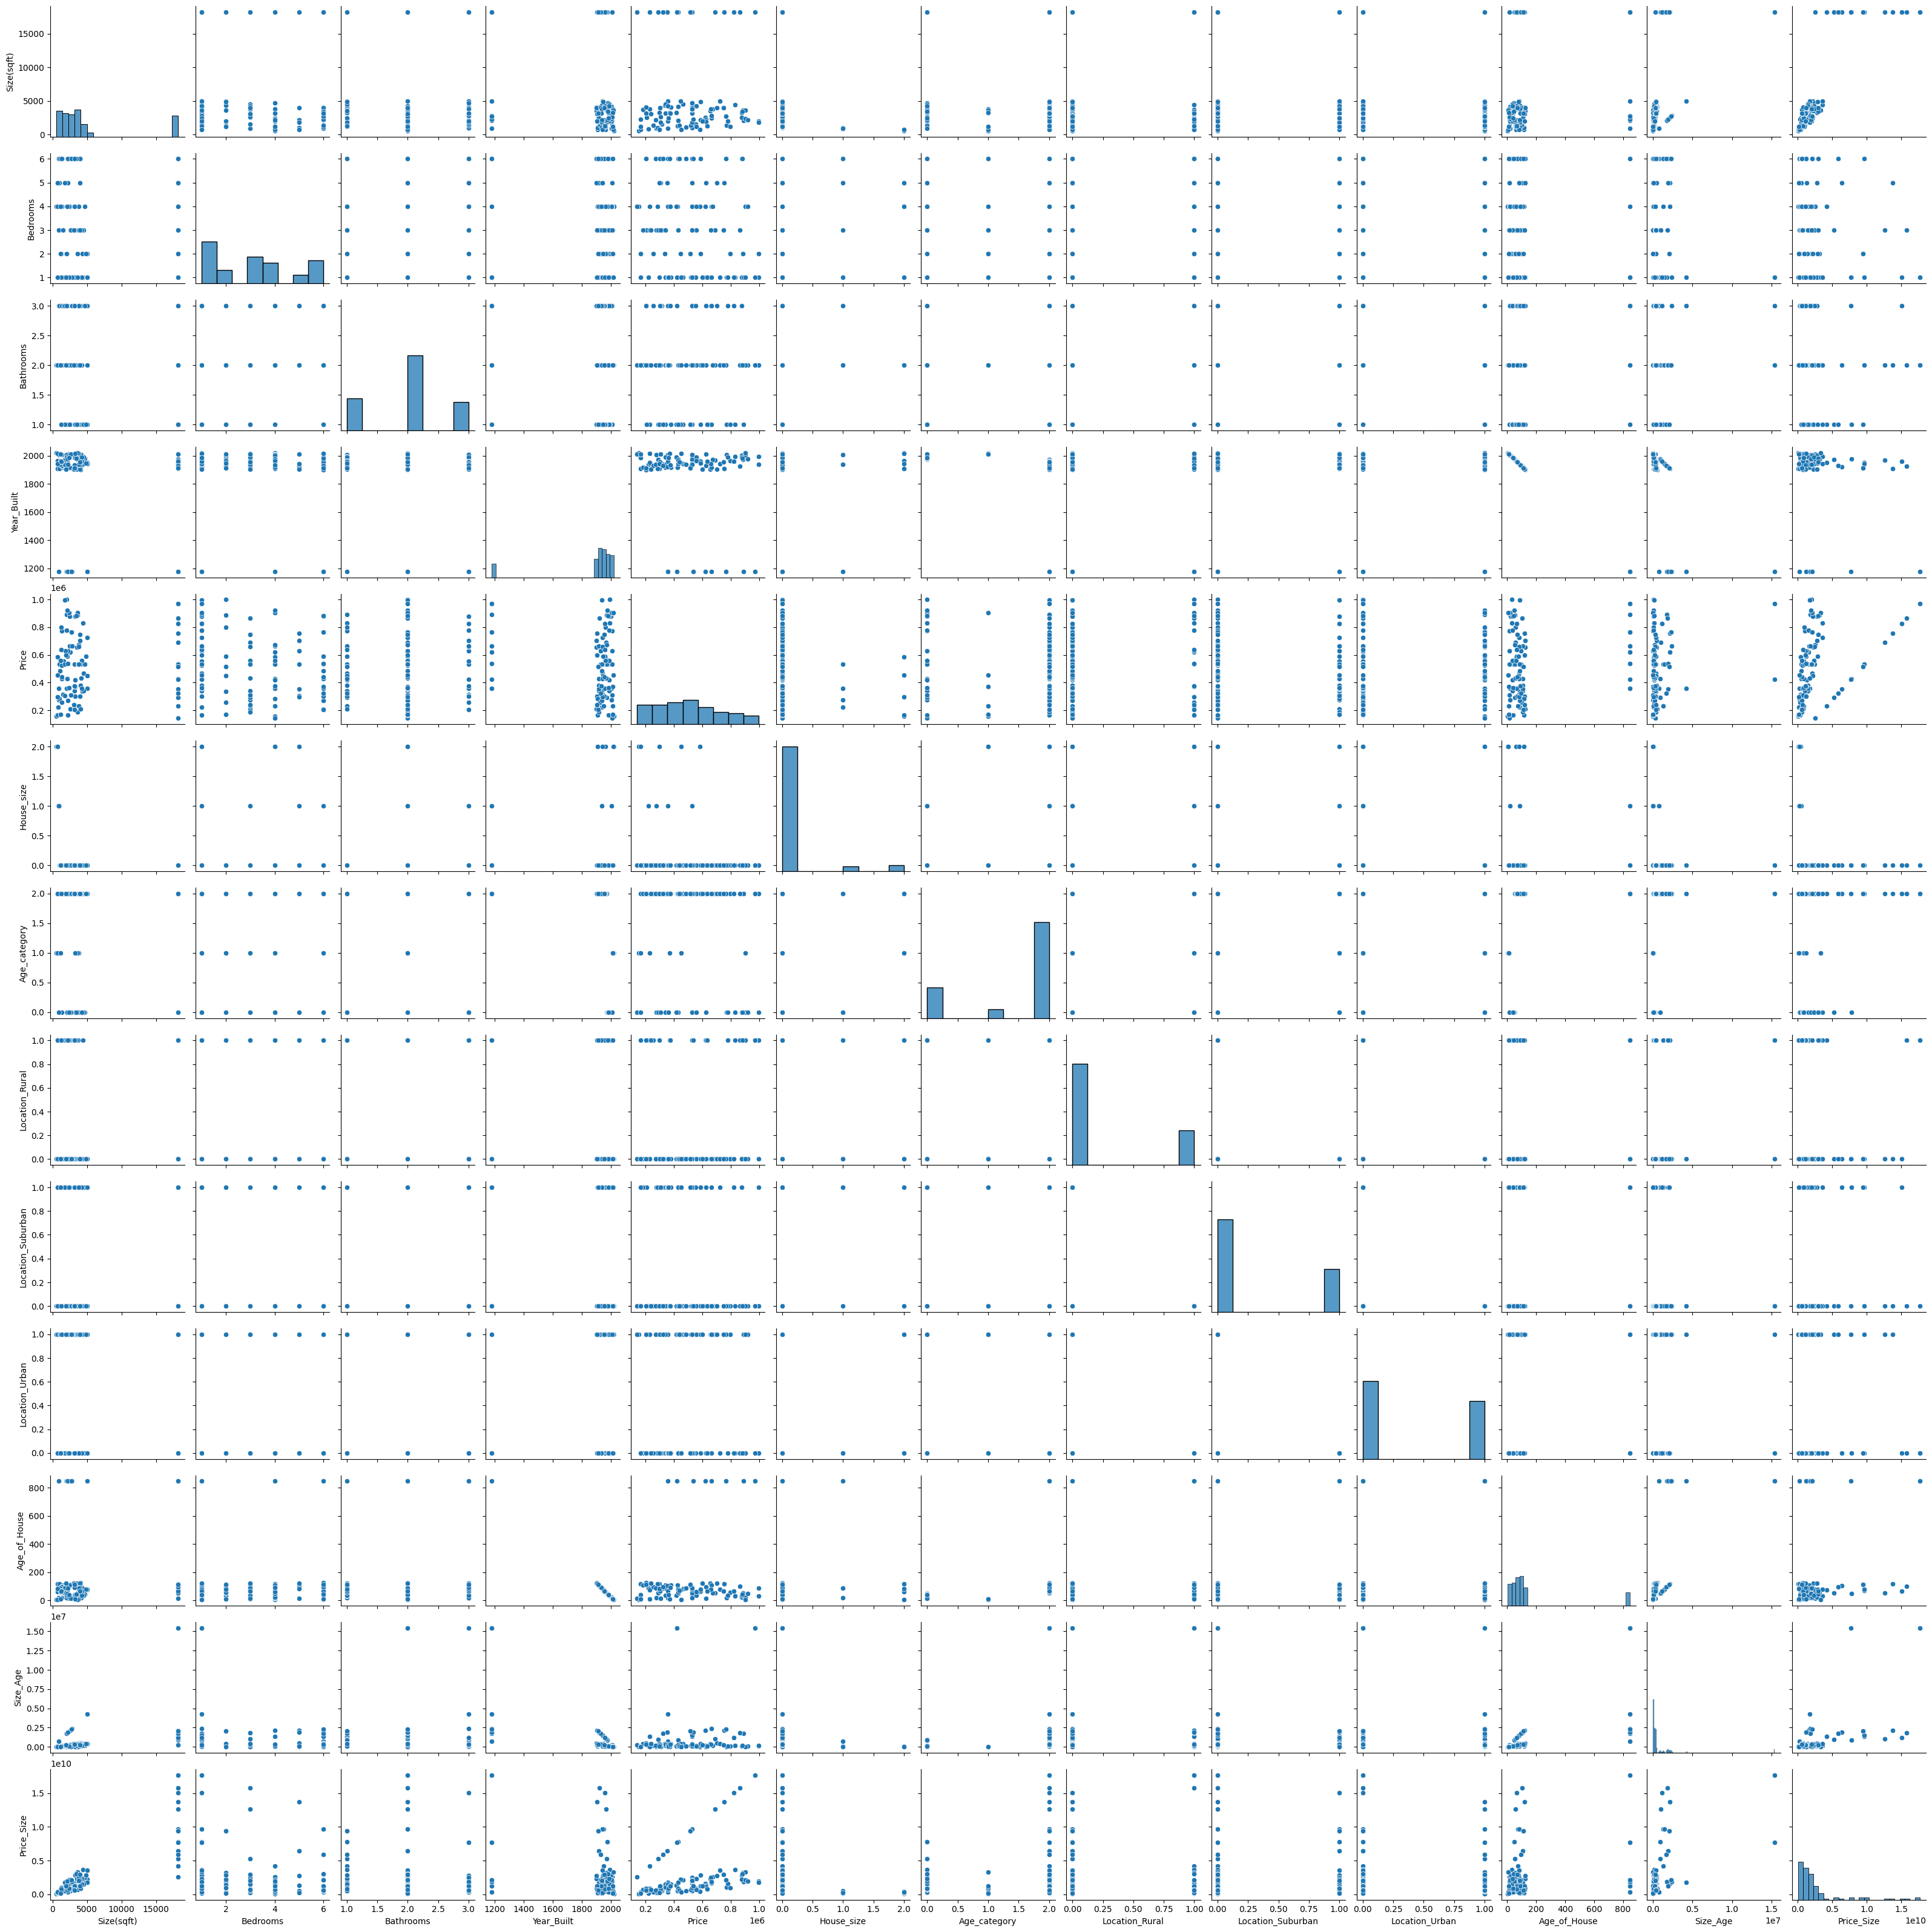

In [ ]:
# Pair plot to visualize scatter plots between variables
sns.pairplot(df)
plt.show()

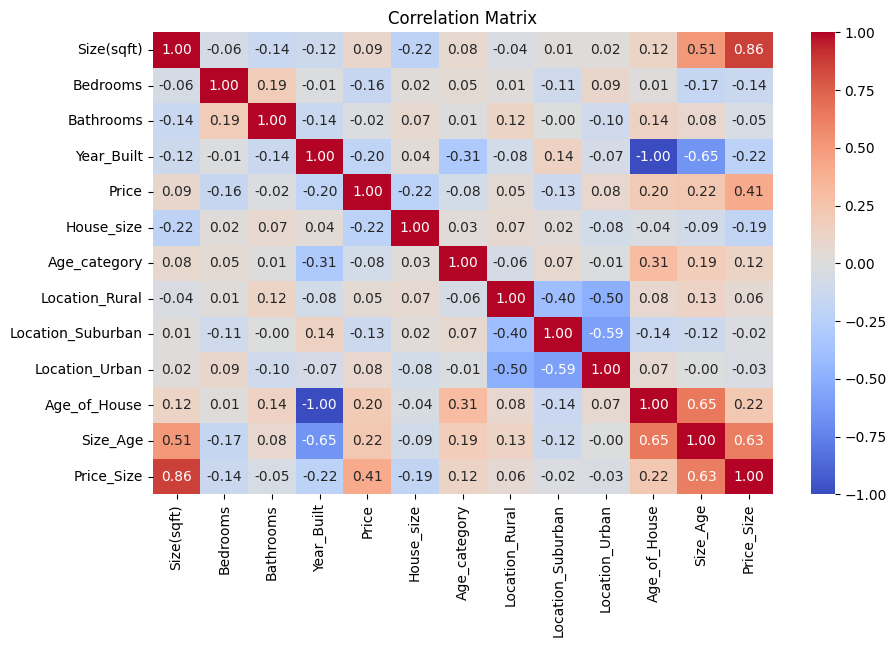

In [ ]:
# Step 2: Correlation Matrix
correlation_matrix = df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features
X = df.select_dtypes(include=[np.number])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)

              Feature           VIF
0          Size(sqft)  6.997481e+00
1            Bedrooms  1.169483e+00
2           Bathrooms  1.151608e+00
3          Year_Built  1.801440e+15
4               Price  2.228574e+00
5          House_size  1.130384e+00
6        Age_category  1.223206e+00
7      Location_Rural  9.007199e+15
8   Location_Suburban  9.007199e+15
9      Location_Urban  9.007199e+15
10       Age_of_House  3.002400e+14
11           Size_Age  3.343768e+00
12         Price_Size  9.625797e+00


###Part 1 Discussion
####The initial pairplosts show some coorelation between several variables such as price and price_size. The heatmap and VIF reveal more of these correlations. Rural, suburban, and urban locations are all significantly correlated with eachother and are to be removed due to them not having any significant influence on other important variables such as price  and size.

###Project 2

####Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X=df.drop('Price', axis=1)  # Features
y=df['Price'] # Target variable

lr=LinearRegression()
rfe=RFE(lr, n_features_to_select=5)
rfe.fit(X, y)

selected_features=X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Bedrooms', 'House_size', 'Location_Rural', 'Location_Suburban',
       'Location_Urban'],
      dtype='object')


####VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

              Feature           VIF
0          Size(sqft)  4.394014e+00
1            Bedrooms  1.163275e+00
2           Bathrooms  1.139388e+00
3          Year_Built  5.209485e+12
4          House_size  1.063927e+00
5        Age_category  1.147931e+00
6      Location_Rural           inf
7   Location_Suburban  1.125900e+15
8      Location_Urban  4.503600e+15
9        Age_of_House  1.286743e+15
10           Size_Age  3.187835e+00
11         Price_Size  5.032799e+00


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


####Lasso Regression for Sparse Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso=Lasso(alpha=0.05)
lasso.fit(X, y)
model=SelectFromModel(lasso, prefit=True)
selected_features = X.columns[model.get_support()]
print("Selected Features with Lasso:", selected_features)

Selected Features with Lasso: Index(['Size(sqft)', 'Bedrooms', 'Bathrooms', 'Year_Built', 'House_size',
       'Age_category', 'Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Age_of_House', 'Size_Age', 'Price_Size'],
      dtype='object')


####Removing Features

In [ ]:
# Drop the location columns
df=df.drop(['Location_Rural', 'Location_Suburban', 'Location_Urban'], axis=1)

# Verify the changes
df.head(5)

,Size(sqft),Bedrooms,Bathrooms,Year_Built,Price,House_size,Age_category,Age_of_House,Size_Age,Price_Size
0,837.000000,1,2,1938,221958.0,1,2,87,7.281900e+04,1.857788e+08
1,1378.000000,1,1,2008,771155.0,0,0,17,2.342600e+04,1.062652e+09
2,18236.172727,4,1,1952,231932.0,0,2,73,1.331241e+06,4.229552e+09
3,4493.000000,1,1,1941,465838.0,0,2,84,3.774120e+05,2.093010e+09
4,879.000000,6,3,1179,359178.0,1,2,846,7.436340e+05,3.157175e+08


Part 2 comment: In the project 2, we were able to explore and apply different feature selection techniques to identify the most relevant features for modeling. In this dataset, we had feature selection that could be applied on recursive feature elimination, where we manipulated selected features. Another component was VIF data and the removal of features such as rural, suburban, and urban locations. Doing this data manipulation allowed us to be able to derive better relationships from the variables by seeing which were the most relevant features to the dataset in order to better train a model.


###Project 3

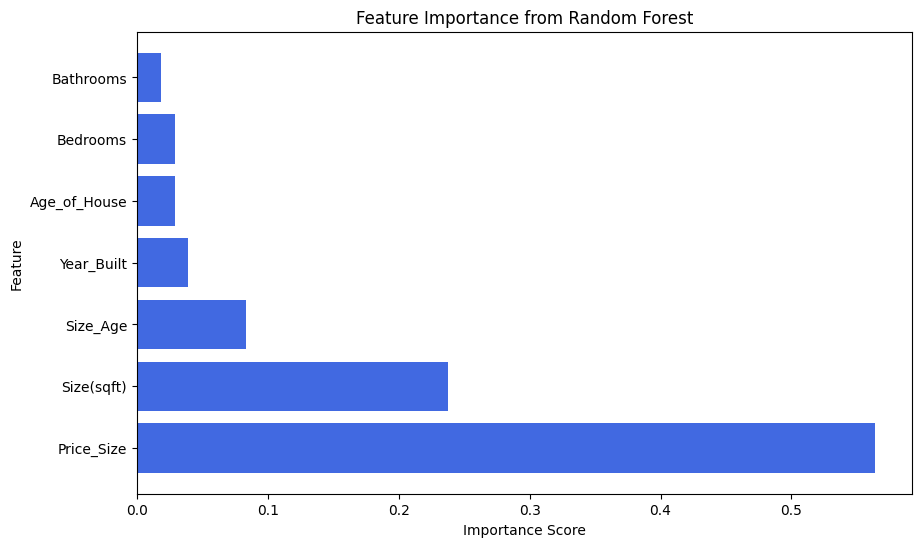

        Feature  Importance
5    Price_Size    0.563822
0    Size(sqft)    0.237661
6      Size_Age    0.083508
3    Year_Built    0.038688
4  Age_of_House    0.029099
1      Bedrooms    0.029014
2     Bathrooms    0.018208


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df[['Size(sqft)','Bedrooms','Bathrooms','Year_Built',"Age_of_House",'Price_Size',"Size_Age"]]  # Input features (replace with your own feature set)
y = df['Price']  # Target variable (replace with your own target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Train a Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display the sorted feature importance
print(importance_df)

In [ ]:
df.shape

(110, 10)

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (88, 9)
Testing set size: (22, 9)


###Project 3 Discussion
#### We wanted to see which variables are the most important in determining our target variable. We used the random forest model to visualize which is the most important. it turns out that the Price_Size ratio is the most important in overall price. We focused on the use of the variables that have the most correlation to see if those variables even have a relationship and what it would be. We had to make sure using the heatmap that they're not just a similar trend and that there is a relationship present to run our prediction model.